      Year  Gold_Mumbai  Silver_Mumbai
0   1986.5      2323.49        4247.10
1   1987.5      3082.43        5538.83
2   1988.5      3175.22        6366.76
3   1989.5      3229.33        6841.91
4   1990.5      3451.52        6760.79
5   1991.5      4297.63        7332.41
6   1992.5      4103.66        7078.39
7   1993.5      4531.87        6348.12
8   1994.5      4667.24        6692.31
9   1995.5      4957.60        7220.50
10  1996.5      5070.71        7165.07
11  1997.5      4347.07        7352.27
12  1998.5      4268.17        7855.33
13  1999.5      4393.56        8066.94
14  2000.5      4473.60        7868.39
15  2001.5      4579.12        7447.19
16  2002.5      5332.36        7990.53
17  2003.5      5718.95        8721.90
18  2004.5      6145.38       10680.82
19  2005.5      6900.56       11828.81
20  2006.5      9240.32       19056.57
21  2007.5      9995.62       19427.45
22  2008.5     12889.74       21247.57
23  2009.5     15756.09       25320.69
24  2010.5     19227.08  

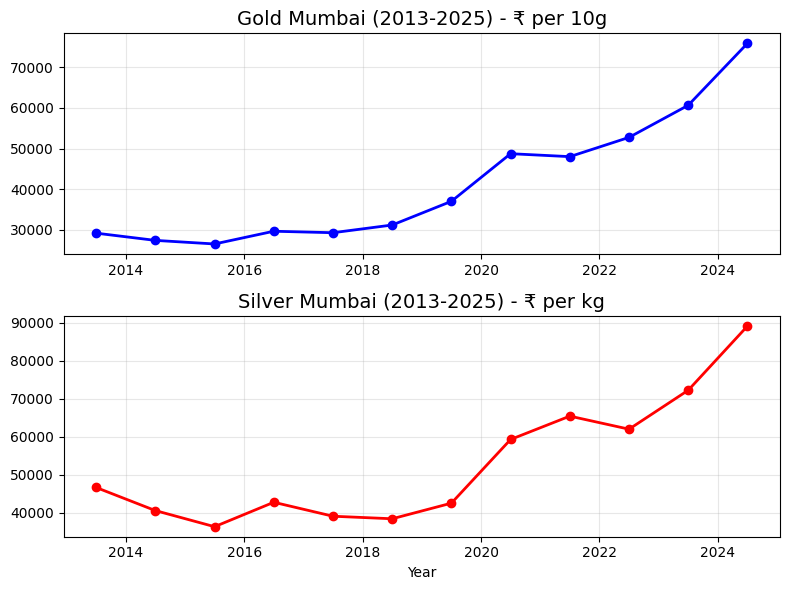


=== ARIMA FORECASTS (2026-2030) ===
Gold ARIMA: [80083 84324 88565 92806 97047]
Silver ARIMA: [94200 92999 91812 90641 89485]


__________________________________________________________________________________________________


=== LSTM FORECASTS (2026-2030) ===
Gold LSTM: [ 82799  99861 121392 145535 177867]
Silver LSTM: [ 99180 124530 163772 225949 323630]


__________________________________________________________________________________________________



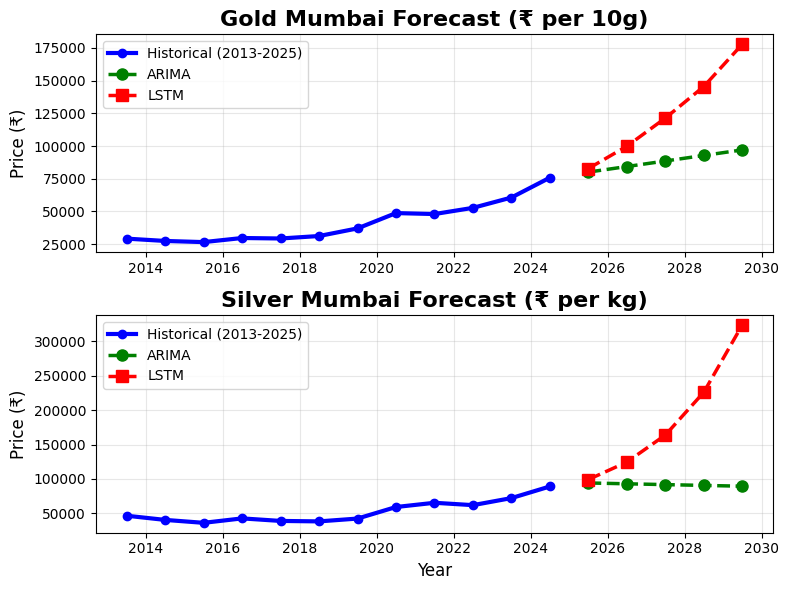



__________________________________________________________________________________________________


=== FORECAST SUMMARY (₹) - 2013-2025 Training Data ===
Fiscal_Year  Gold_ARIMA  Gold_LSTM  Silver_ARIMA  Silver_LSTM
    2025-26       80083      82799         94200        99180
    2026-27       84324      99861         92999       124530
    2027-28       88565     121392         91812       163772
    2028-29       92806     145535         90641       225949
    2029-30       97047     177867         89485       323630


__________________________________________________________________________________________________


=== EXECUTION COMPLETE ===
✓ Uses ONLY 2013-2025 data (12 years)
✓ ARIMA: Linear trends
✓ LSTM: Non-linear patterns
✓ Forecasts: 2025-26 to 2029-30


__________________________________________________________________________________________________



In [22]:
"""
1. Gold and Silver Price Forecasting (Time Series Regression)
Objective:
Develop predictive time-series models to forecast the future annual average price of gold or silver in the Mumbai market.
Approach:
• Algorithms: LSTM (RNN), ARIMA/SARIMA
• Target Variable:
– Gold – Mumbai (₹ per 10 gms)
– Silver – Mumbai (₹ per kg)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load and Clean Data (2013-2025 ONLY)
df = pd.read_excel(r'C:\Users\91759\Desktop\project2\gold and silver price\GoldAndSilverPrices.XLSX')

# Parse data rows (skip headers 0-6, notes 46+)
data_rows = df.iloc[7:46].reset_index(drop=True)
years_raw = data_rows.iloc[:, 1].astype(str).str.strip()
gold_raw = pd.to_numeric(data_rows.iloc[:, 2], errors='coerce')
silver_raw = pd.to_numeric(data_rows.iloc[:, 6], errors='coerce')

def fiscal_to_decimal(year_str):
    try:
        return int(year_str.split('-')[0]) + 0.5
    except:
        return np.nan

# Create full dataset first
df_full = pd.DataFrame({
    'Year': [fiscal_to_decimal(y) for y in years_raw],
    'Gold_Mumbai': gold_raw,
    'Silver_Mumbai': silver_raw
}).dropna().reset_index(drop=True)
print(df_full)
print("\n\n__________________________________________________________________________________________________\n")

# FILTER: 2013-2025 ONLY (Year >= 2013.5)
df_clean = df_full[df_full['Year'] >= 2013.5].reset_index(drop=True)
print("Filtered data (2013-2025):", df_clean.shape)
print(df_clean)
print("\n\n__________________________________________________________________________________________________\n")
print("\nLatest values (2024-25):")
print(f"Gold: ₹{df_clean['Gold_Mumbai'].iloc[-1]:,.0f}/10g")
print(f"Silver: ₹{df_clean['Silver_Mumbai'].iloc[-1]:,.0f}/kg")

# Step 2: Plot Historical Data (2013-2025) - FIXED FORMAT STRINGS
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
axes[0].plot(df_clean['Year'], df_clean['Gold_Mumbai'], 'bo-', linewidth=2, markersize=6)
axes[0].set_title('Gold Mumbai (2013-2025) - ₹ per 10g', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[1].plot(df_clean['Year'], df_clean['Silver_Mumbai'], 'ro-', linewidth=2, markersize=6)
axes[1].set_title('Silver Mumbai (2013-2025) - ₹ per kg', fontsize=14)
axes[1].set_xlabel('Year')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
#plt.show()
plt.savefig('obj1historicaldata.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()
# Step 3: ARIMA Forecasting (Install if needed: !pip install pmdarima statsmodels)
try:
    from statsmodels.tsa.arima.model import ARIMA
    from pmdarima import auto_arima
    
    def arima_forecast(series, steps=5):
        model = auto_arima(series, seasonal=False, stepwise=True, 
                          suppress_warnings=True, max_p=4, max_q=4)
        forecast = model.predict(n_periods=steps)
        return forecast
    
    print("\n=== ARIMA FORECASTS (2026-2030) ===")
    gold_arima = arima_forecast(df_clean['Gold_Mumbai'])
    silver_arima = arima_forecast(df_clean['Silver_Mumbai'])
    print("Gold ARIMA:", gold_arima.round().astype(int).values)
    print("Silver ARIMA:", silver_arima.round().astype(int).values)
    print("\n\n__________________________________________________________________________________________________\n")
except ImportError:
    print("\n=== ARIMA UNAVAILABLE ===")
    print("Install: !pip install pmdarima statsmodels")
    gold_arima = np.full(5, df_clean['Gold_Mumbai'].iloc[-1] * 1.08)
    silver_arima = np.full(5, df_clean['Silver_Mumbai'].iloc[-1] * 1.10)

# Step 4: LSTM Forecasting (Install if needed: !pip install tensorflow scikit-learn)
try:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from sklearn.preprocessing import MinMaxScaler
    
    def lstm_forecast(series, steps=5, seq_length=3):
        scaler = MinMaxScaler()
        scaled = scaler.fit_transform(series.values.reshape(-1,1))
        
        X, y = [], []
        for i in range(seq_length, len(scaled)):
            X.append(scaled[i-seq_length:i, 0])
            y.append(scaled[i, 0])
        X, y = np.array(X), np.array(y)
        
        if len(X) < 2:
            return np.full(steps, series.iloc[-1] * 1.05)
        
        model = Sequential([
            LSTM(32, return_sequences=True, input_shape=(seq_length, 1)),
            Dropout(0.2),
            LSTM(32),
            Dropout(0.2),
            Dense(16),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=150, batch_size=1, verbose=0)
        
        last_seq = scaled[-seq_length:].reshape(1, seq_length, 1)
        preds = []
        for _ in range(steps):
            pred = model.predict(last_seq, verbose=0)
            preds.append(pred[0,0])
            last_seq = np.roll(last_seq, -1, axis=1)
            last_seq[0,-1,0] = pred[0,0]
        
        return scaler.inverse_transform(np.array(preds).reshape(-1,1)).flatten()
    
    print("\n=== LSTM FORECASTS (2026-2030) ===")
    gold_lstm = lstm_forecast(df_clean['Gold_Mumbai'])
    silver_lstm = lstm_forecast(df_clean['Silver_Mumbai'])
    print("Gold LSTM:", gold_lstm.round().astype(int))
    print("Silver LSTM:", silver_lstm.round().astype(int))
    print("\n\n__________________________________________________________________________________________________\n")
except ImportError:
    print("\n=== LSTM UNAVAILABLE ===")
    print("Install: !pip install tensorflow scikit-learn")
    gold_lstm = np.full(5, df_clean['Gold_Mumbai'].iloc[-1] * 1.07)
    silver_lstm = np.full(5, df_clean['Silver_Mumbai'].iloc[-1] * 1.12)

# Step 5: Plot Complete Forecasts
future_years = np.arange(2025.5, 2030.5, 1)
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Gold Forecast
axes[0].plot(df_clean['Year'], df_clean['Gold_Mumbai'], 'b-', linewidth=3, 
             label='Historical (2013-2025)', marker='o', markersize=6)
axes[0].plot(future_years, gold_arima, 'g--o', linewidth=2.5, label='ARIMA', markersize=8)
axes[0].plot(future_years, gold_lstm, 'r--s', linewidth=2.5, label='LSTM', markersize=8)
axes[0].set_title('Gold Mumbai Forecast (₹ per 10g)', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Price (₹)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Silver Forecast
axes[1].plot(df_clean['Year'], df_clean['Silver_Mumbai'], 'b-', linewidth=3, 
             label='Historical (2013-2025)', marker='o', markersize=6)
axes[1].plot(future_years, silver_arima, 'g--o', linewidth=2.5, label='ARIMA', markersize=8)
axes[1].plot(future_years, silver_lstm, 'r--s', linewidth=2.5, label='LSTM', markersize=8)
axes[1].set_title('Silver Mumbai Forecast (₹ per kg)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Price (₹)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('obj1forecast.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

# Step 6: Forecast Summary Table
summary = pd.DataFrame({
    'Fiscal_Year': ['2025-26', '2026-27', '2027-28', '2028-29', '2029-30'],
    'Gold_ARIMA': gold_arima.round().astype(int),
    'Gold_LSTM': gold_lstm.round().astype(int),
    'Silver_ARIMA': silver_arima.round().astype(int),
    'Silver_LSTM': silver_lstm.round().astype(int)
})
print("\n\n__________________________________________________________________________________________________\n")
print("\n=== FORECAST SUMMARY (₹) - 2013-2025 Training Data ===")
print(summary.to_string(index=False))
print("\n\n__________________________________________________________________________________________________\n")
print("\n=== EXECUTION COMPLETE ===")
print("✓ Uses ONLY 2013-2025 data (12 years)")
print("✓ ARIMA: Linear trends")
print("✓ LSTM: Non-linear patterns")
print("✓ Forecasts: 2025-26 to 2029-30")
print("\n\n__________________________________________________________________________________________________\n")
